## Installing and importing libraries, downloading dataset




In [1]:
!pip install opendatasets --quiet     #installing opendatasets

In [2]:
!pip install jovian --upgrade --quiet    #installing jovian

In [3]:
#downloading datasets from kaggle using opendatasets

import opendatasets as od
download_url='https://www.kaggle.com/datasets/austinreese/usa-housing-listings'
od.download(download_url)

Skipping, found downloaded files in "./usa-housing-listings" (use force=True to force download)


###**About the dataset:**
The dataset is the collection of privately sold housing options in the USA. It consists of data for about more than 300k properties. The data includes information about the region, state, type, number of bedrooms, no of bathrooms, price, area, whether furnished or not, latitudes and longitudes etc. of the properties.

## Data Preparation

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import jovian

In [5]:
download_file='/content/usa-housing-listings/housing.csv'
housing_df = pd.read_csv(download_file)
housing_df.head(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
5,7046327064,https://reno.craigslist.org/apa/d/reno-walk-in...,reno / tahoe,https://reno.craigslist.org,1093,apartment,720,1,1.0,1,...,0,0,0,laundry in bldg,NaN,https://images.craigslist.org/00808_1EfWoZv4NX...,"1BD | 1BA | 720SQFTIn addition to attractive, ...",39.4572,-119.776,ca
6,7049020738,https://reno.craigslist.org/apa/d/1-bedroom-av...,reno / tahoe,https://reno.craigslist.org,935,apartment,661,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00C0C_i1DJWxfSZC...,Tucked away in a park-like setting on the edge...,39.5118,-119.802,ca
7,7049041899,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
8,7049041451,https://reno.craigslist.org/apa/d/sparks-bouti...,reno / tahoe,https://reno.craigslist.org,1525,apartment,1053,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00W0W_aMt5LvqkQh...,"BRAND NEW APARTMENT HOMES, NOW OPEN! **GET 1 ...",39.6185,-119.672,ca
9,7049041434,https://reno.craigslist.org/apa/d/reno-6850-sh...,reno / tahoe,https://reno.craigslist.org,1295,condo,930,2,2.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_8AoC9NJZWA...,6850 Sharlands Ave E-1021 Reno NV 89523 ...,39.5193,-119.897,ca


## Exploring Dataset

In [6]:
# no of rows in the dataset
len(housing_df)

384977

In [7]:
# column names
housing_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [8]:
# column information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

## Data cleaning

In [9]:
#counting null values
housing_df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [10]:
# selecting useful columns
columns=['region', 'price', 'type', 'sqfeet', 'beds',
       'baths','comes_furnished','lat',
       'long', 'state']
housing_data = housing_df[columns]

In [11]:
len(housing_data)

384977

In [12]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   region           384977 non-null  object 
 1   price            384977 non-null  int64  
 2   type             384977 non-null  object 
 3   sqfeet           384977 non-null  int64  
 4   beds             384977 non-null  int64  
 5   baths            384977 non-null  float64
 6   comes_furnished  384977 non-null  int64  
 7   lat              383059 non-null  float64
 8   long             383059 non-null  float64
 9   state            384977 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 29.4+ MB


In [13]:
# counting null values
housing_data.isna().sum()

region                0
price                 0
type                  0
sqfeet                0
beds                  0
baths                 0
comes_furnished       0
lat                1918
long               1918
state                 0
dtype: int64

In [14]:
# dropping rows with null values
housing_data.dropna(inplace=True)

<ipython-input-14-bfc68a1b9d4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data.dropna(inplace=True)


In [15]:
housing_data

,region,price,type,sqfeet,beds,baths,comes_furnished,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,0,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,0,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,0,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,0,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,0,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,0,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,0,39.5585,-119.703,ca


In [16]:
# resetting index
housing_data.reset_index(inplace= True)

In [17]:
housing_data.drop(columns='index', inplace= True)

<ipython-input-17-c7c73a873d68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data.drop(columns='index', inplace= True)


In [18]:
# identifying the ouliers
housing_data.quantile(q=0.99)

<ipython-input-18-4eb8039975a9>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_data.quantile(q=0.99)


price              3395.0000
sqfeet             2400.0000
beds                  4.0000
baths                 3.0000
comes_furnished       1.0000
lat                  48.2038
long                -71.3034
Name: 0.99, dtype: float64

In [19]:
# dealing with outliers
price_range = (housing_data.price > 100)&(housing_data.price < 3500)
area_range = (housing_data.sqfeet > 80) & (housing_data.sqfeet < 2500)
bedroom_range = (housing_data.beds < 10) 
bathroom_range = (housing_data.baths < 10) 
house = housing_data.loc[price_range & area_range & bedroom_range & bathroom_range]

In [20]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373644 entries, 0 to 383058
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   region           373644 non-null  object 
 1   price            373644 non-null  int64  
 2   type             373644 non-null  object 
 3   sqfeet           373644 non-null  int64  
 4   beds             373644 non-null  int64  
 5   baths            373644 non-null  float64
 6   comes_furnished  373644 non-null  int64  
 7   lat              373644 non-null  float64
 8   long             373644 non-null  float64
 9   state            373644 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.4+ MB


In [21]:
# showing the number of unique states
house['state code'] = house['state']
house['state'].unique()


<ipython-input-21-12554f886833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['state code'] = house['state']


array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

In [22]:
house['state'] = house['state'].replace(
    {'al':"Alabama",'ak':"Alaska",'az':"Arizona",'ar':"Arkansas",'ca':"California", 'co':"Colorado",'ct':"Connecticut",'de':"Delaware",
     'fl':"Florida",'ga':"Georgia",'hi':"Hawaii",'id':"Idaho",'il':"Illinois",'in':"Indiana",'ia':"Iowa",'ks':"Kansas",'ky':"Kentucky",
     'la':"Louisiana",'me':"Maine",'md':"Maryland",'ma':"Massachusetts",'mi':"Michigan",'mn':"Minnesota",'ms':"Mississippi",
     'mo':"Missouri",'mt':"Montana",'ne':"Nebraska",'nv':"Nevada",'nh':"New Hampshire", 'nj':"New Jersey",'nm':"New Mexico",'ny':"New York",
     'nc':"North Carolina",'nd':"North Dakota",'oh':"Ohio",'ok':"Oklahoma",'or':"Oregon",'pa':"Pennsylvania",'ri':"Rhode Island",
     'sc':"South Carolina",'sd':"South Dakota",'tn':"Tennessee",'tx':"Texas",'ut':"Utah",'vt':"Vermont",
     'va':"Virginia",'wa':"Washington",'wv':"West Virginia",'wi':"Wisconsin",'wy':"Wyoming",'dc':"District of Columbia"})

<ipython-input-22-5fbb9fe64862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['state'] = house['state'].replace({'al':"Alabama",


In [23]:
house.head()

,region,price,type,sqfeet,beds,baths,comes_furnished,lat,long,state,state code
0,reno / tahoe,1148,apartment,1078,3,2.0,0,39.5483,-119.796,California,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,39.5026,-119.789,California,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,0,39.6269,-119.708,California,ca
3,reno / tahoe,1095,apartment,708,1,1.0,0,39.4477,-119.771,California,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,39.5357,-119.805,California,ca


In [24]:
house.describe()

,price,sqfeet,beds,baths,comes_furnished,lat,long
count,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000
mean,1153.035526,972.956552,1.869718,1.464079,0.045388,37.235526,-92.544577
std,490.529468,324.343213,0.849550,0.568749,0.208154,5.545023,16.410311
min,106.000000,85.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,809.000000,750.000000,1.000000,1.000000,0.000000,33.439050,-98.616900
50%,1030.000000,940.000000,2.000000,1.000000,0.000000,37.658000,-87.660400
75%,1380.000000,1134.000000,2.000000,2.000000,0.000000,41.146000,-81.179600
max,3499.000000,2499.000000,8.000000,7.500000,1.000000,102.036000,94.156100


In [25]:
house.price.mean()

1153.0355257946067

In [26]:
house.sqfeet.mean()

972.9565522261832

## Asking and answering questions

#### 1. What are the different types of properties sold ? Which property type is the most preferred ? 





In [27]:
# different types of properties
house['type'].value_counts()

apartment          312142
house               29209
townhouse           15423
condo                5858
duplex               4874
manufactured         4092
cottage/cabin         694
loft                  674
flat                  503
in-law                168
land                    5
assisted living         2
Name: type, dtype: int64

In [28]:
# identifying most popular property type
property_type = pd.DataFrame(house.type.value_counts().head(6))
property_type


,type
apartment,312142
house,29209
townhouse,15423
condo,5858
duplex,4874
manufactured,4092


<Figure size 600x400 with 0 Axes>

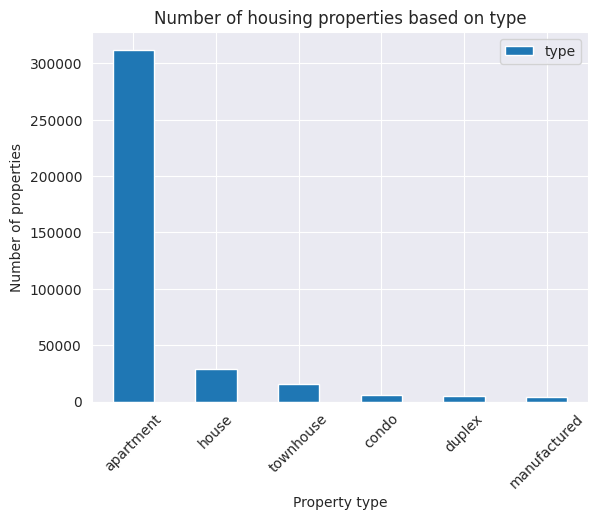

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
property_type.plot(kind='bar')
plt.title('Number of housing properties based on type')
plt.xlabel('Property type')
plt.ylabel('Number of properties')
plt.xticks(rotation=45);

There are total 12 types of properties available. More than 90% of all the listed properties are of apartment type. Apartments are the most common type of accomodation in the areas with high population density. 


### 2. What is the most common structure of the sold properties? 

In [30]:
# counting number of properties with different numbers of bedrooms
house.beds.value_counts()

2    172102
1    115397
3     64133
0     10769
4      9703
5      1463
6        65
8         8
7         4
Name: beds, dtype: int64

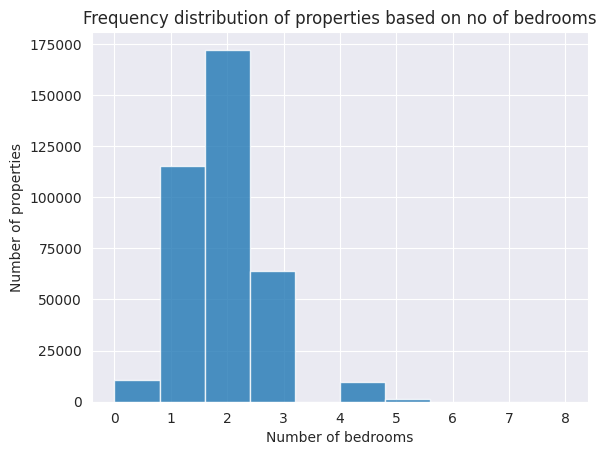

In [31]:
house.beds.plot(kind='hist', bins = 10, alpha = 0.8)
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of properties')
plt.title('Frequency distribution of properties based on no of bedrooms');

In [32]:
house.baths.value_counts()

1.0    194618
2.0    131042
1.5     26954
2.5     11939
3.0      4162
0.0      3012
4.0      1172
3.5       530
4.5       130
5.0        43
5.5        37
6.0         4
7.5         1
Name: baths, dtype: int64

Text(0.5, 1.0, 'Boxplot distribution based on no of bathrooms')

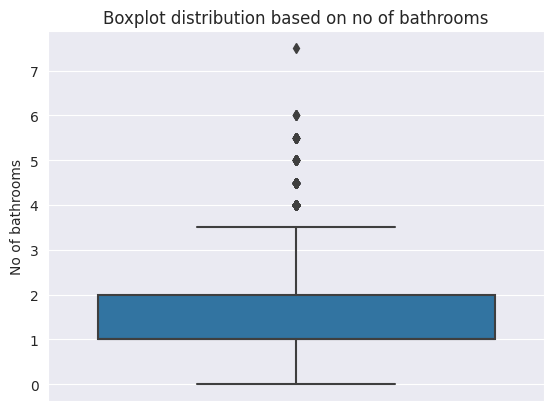

In [33]:
sns.boxplot(house, y='baths')
plt.ylabel('No of bathrooms')
plt.title('Boxplot distribution based on no of bathrooms')

In [34]:
# calculating the number of furnished and unfurnished properties
house.comes_furnished.value_counts()

0    356685
1     16959
Name: comes_furnished, dtype: int64

Most of the sold properties have 2 bedrooms, followed by a single bedroom and 1 bathroom which usually is the requirement of working singles. Some properties having 3 bedrooms and 2 bathrooms suggests small families. The number of furnished properties is less than 5% of the total properties sold.

### 3. How does the size of the property impact the price of the property ? What are the other factors that can influence the price? 

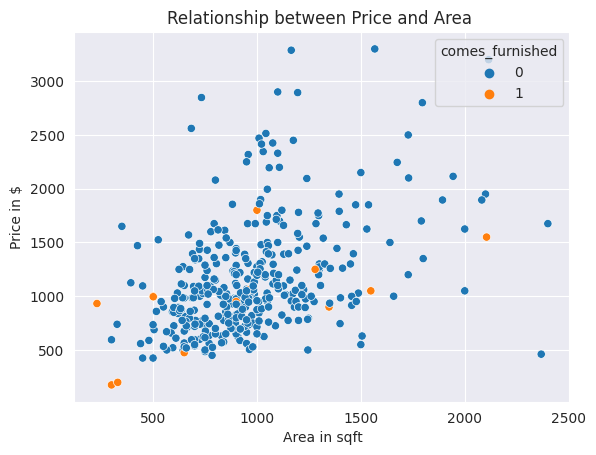

In [35]:
# making a sample data
sample = house.sample(int(0.001*len(house)))

# plotting the price and the area of furnished and unfurnished properties on a scatterplot
sns.scatterplot(sample,y=sample.price, x = sample.sqfeet, hue =sample.comes_furnished)
plt.xlabel('Area in sqft')
plt.ylabel('Price in $')
plt.title('Relationship between Price and Area ');

The price and area of a property are correlated. Various other factors like type of locality, proximity to health facilities, airports, educational institutions etc. can contribute to the price of a property.


### 4. Calculate the top 10 states with highest average price per squarefeet for the properties.

In [36]:
# adding a new column to the dataset named 'price per sqft = price/sqft'
house['price per sqft'] = house['price']/house['sqfeet']
house.head()

<ipython-input-36-780f215d000f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price per sqft'] = house['price']/house['sqfeet']


,region,price,type,sqfeet,beds,baths,comes_furnished,lat,long,state,state code,price per sqft
0,reno / tahoe,1148,apartment,1078,3,2.0,0,39.5483,-119.796,California,ca,1.064935
1,reno / tahoe,1200,condo,1001,2,2.0,0,39.5026,-119.789,California,ca,1.198801
2,reno / tahoe,1813,apartment,1683,2,2.0,0,39.6269,-119.708,California,ca,1.077243
3,reno / tahoe,1095,apartment,708,1,1.0,0,39.4477,-119.771,California,ca,1.546610
4,reno / tahoe,289,apartment,250,0,1.0,1,39.5357,-119.805,California,ca,1.156000


In [37]:
# getting statistical values for numerical columns
house.describe()

,price,sqfeet,beds,baths,comes_furnished,lat,long,price per sqft
count,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000,373644.000000
mean,1153.035526,972.956552,1.869718,1.464079,0.045388,37.235526,-92.544577,1.265238
std,490.529468,324.343213,0.849550,0.568749,0.208154,5.545023,16.410311,0.617286
min,106.000000,85.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000,0.060000
25%,809.000000,750.000000,1.000000,1.000000,0.000000,33.439050,-98.616900,0.888889
50%,1030.000000,940.000000,2.000000,1.000000,0.000000,37.658000,-87.660400,1.121795
75%,1380.000000,1134.000000,2.000000,2.000000,0.000000,41.146000,-81.179600,1.470588
max,3499.000000,2499.000000,8.000000,7.500000,1.000000,102.036000,94.156100,30.000000


In [38]:
# calculating statewise average price per unit area 
state_avg_price_area = house.groupby('state')['price per sqft'].mean()

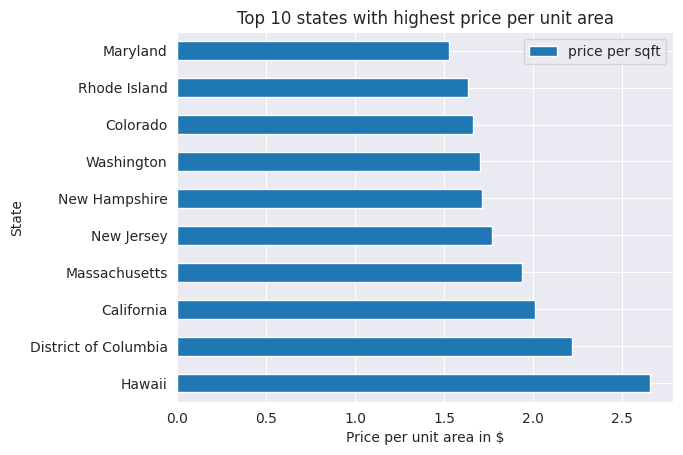

In [39]:
state_avg_price_area.sort_values(ascending = False).head(10).plot(kind='barh')
plt.xlabel('Price per unit area in $')
plt.ylabel('State')
plt.title('Top 10 states with highest price per unit area')
plt.legend();

Hawaii being a tourist destination  island state in the pacific has the highest average price per unit area, followed by the capital city of DC. There are 5 north eastern coastal states in the top 10 states with average price per unit area for a property.  

### 5. Which regions have the highest number of housing properties sold ?

In [40]:
# Creating a new dataframe by grouping the properties data regionwise and 
# then aggregating the average values of price, area and price per unit area.

region_avg_df = house.groupby(['region','state']).agg({'region':'count',
                                            'price':'mean',
                                            'sqfeet':'mean',
                                            'price per sqft':'mean'})
region_avg_df

region        price       sqfeet  \
region                 state                                            
SF bay area            California      1720  2500.254070   833.842442   
abilene                Texas            892   792.477578   868.060538   
akron / canton         Ohio            1516   846.682058   994.015172   
albany                 Georgia          844   698.966825  1030.251185   
                       New York        1198  1253.459098  1061.068447   
...                                     ...          ...          ...   
york                   Pennsylvania     623  1041.605136  1091.332263   
youngstown             Ohio             250   737.116000  1160.944000   
yuba-sutter            California       143  1447.650350  1263.111888   
yuma                   Arizona          212   796.174528   783.849057   
zanesville / cambridge Ohio             193   863.378238  1147.611399   

                                     price per sqft  
region                 state                         
SF bay area            California          3.260138  
abilene                Texas               0.957534  
akron / canton         Ohio                0.901439  
albany                 Georgia             0.720068  
                       New York            1.249471  
...                                             ...  
york                   Pennsylvania        1.076597  
youngstown             Ohio                0.683795  
yuba-sutter            California          1.238950  
yuma                   Arizona             1.095765  
zanesville / cambridge Ohio                0.773377  

[427 rows x 4 columns]

In [41]:
region_avg_df.rename(columns={'region':'total_properties'},inplace=True)

In [42]:
region_avg_df.reset_index(inplace=True)

In [43]:
region_avg_df['region'] = region_avg_df['region'].str.capitalize()


In [44]:
# Regions with the highest number of sold properties
region_avg_df.sort_values(by=['total_properties'], ascending = False).head(15)

,region,state,total_properties,price,sqfeet,price per sqft
124,Fredericksburg,Virginia,2726,1294.162142,1102.804109,1.223715
269,Omaha / council bluffs,Iowa,2703,935.820570,939.002960,1.034066
317,Salt lake city,Utah,2653,1222.592537,934.707124,1.366817
111,Fayetteville,North Carolina,2612,836.370214,1032.147397,0.840868
167,Jacksonville,Florida,2571,1089.247375,968.857643,1.163625
328,Savannah / hinesville,Georgia,2565,1068.657310,970.644834,1.184329
290,Portland,Oregon,2533,1469.881169,912.795894,1.751862
274,Orlando,Florida,2531,1306.364283,999.745555,1.368778
331,Seattle-tacoma,Washington,2523,1789.274673,861.076100,2.295109
204,Lincoln,Nebraska,2522,989.639175,1032.594766,0.993877


In [45]:
import folium
m = folium.Map(location=[48,-102], zoom_start=3)

In [46]:
lat_lon_pairs = list(zip(list(sample.lat),list(sample.long)))

In [47]:
from folium import plugins
from folium.plugins import HeatMap
HeatMap(lat_lon_pairs).add_to(m)
m

The regions with most properties sold have a relatively lower average price per unit area which might have resulted in a relatively larger number of properties sold.

The eastern half of the country has more housing properties sold than the western half. Except for a couple of coastal states of the western USA, most states still lack enough job opportunities for immigrants to i    

### 6. What are the top 10 costliest and the cheapest regions to reside in USA? What could be the possible reasons justifying their property rates? 

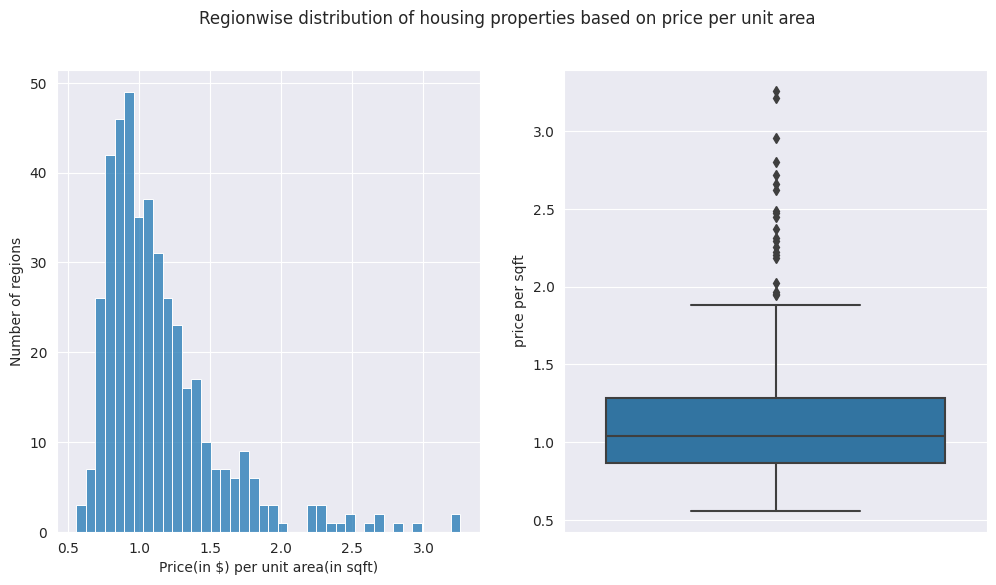

In [48]:
# identifying the most common average price per unit area across the regions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(region_avg_df,x='price per sqft',bins = 40)
plt.xlabel('Price(in $) per unit area(in sqft)')
plt.ylabel('Number of regions')

plt.subplot(1,2,2)
sns.boxplot(region_avg_df,y='price per sqft' )

plt.suptitle('Regionwise distribution of housing properties based on price per unit area');

In [49]:
# Regions with highest avg property price per unit area
region_avg_df.sort_values('price per sqft',ascending = False).head(10)

,region,state,total_properties,price,sqfeet,price per sqft
0,Sf bay area,California,1720,2500.254070,833.842442,3.260138
324,Santa barbara,California,388,2464.180412,838.585052,3.212818
247,New york city,New York,603,2275.315091,863.470978,2.953372
208,Los angeles,California,1959,2218.847882,845.369576,2.800652
235,Monterey bay,California,1043,2139.877277,845.575264,2.715979
145,Hawaii,Hawaii,1677,1941.799642,825.144902,2.656843
117,Florida keys,Florida,423,2348.664303,942.333333,2.621711
37,Boston,Massachusetts,1389,2177.179266,969.981281,2.486655
320,San diego,California,2184,2095.636447,901.828755,2.472973
272,Orange county,California,2289,2070.250765,874.811271,2.447772


In [50]:
# Regions with lowest avg property price per unit area
region_avg_df.sort_values('price per sqft').head(10)

,region,state,total_properties,price,sqfeet,price per sqft
353,Southwest ks,Kansas,43,600.697674,1058.953488,0.557949
347,Southeast ks,Kansas,89,588.932584,1038.359551,0.587957
372,Stillwater,Oklahoma,280,565.778571,1006.153571,0.609727
121,"Fort smith, ar",Oklahoma,4,467.500000,724.250000,0.662287
217,Mansfield,Ohio,104,703.076923,1122.865385,0.662953
355,Southwest ms,Mississippi,11,842.818182,1338.090909,0.671285
423,Youngstown,Ohio,250,737.116000,1160.944000,0.683795
409,Western ky,Kentucky,67,693.417910,1104.417910,0.684980
77,Danville,Virginia,105,777.752381,1173.971429,0.687282
120,Fort smith,Arkansas,141,870.354610,1328.936170,0.687775


In [51]:
px.scatter(region_avg_df, x='sqfeet',y='price',size='price per sqft', color='state', hover_data=['region'],
           labels={'price':'Price in $','sqfeet': 'Area in sqft'},
           title ='Average price and average area of the properties for different regions')

The average price per unit area for most of the properties lies in the range of 0.8 to 1.3 dollars per sqft. 4 out of top 5 costliest regions are in the California state : Bay Area, Santa Barbara, Los Angeles and Monterey bay. In the state of New York, New York city and Long Island region are the regions with highest average price per sqft. The landlocked regions of Oklahoma and Kansas have the lowest values.

### 7. How does the statewise avg price, avg area and avg price per unit area of the properties vary across the country?

1. plot a statewise interactive scatter plot for average price and 
average area.
2. plot the top 20 states with highest average price 




In [52]:
#calculating statewise average price of a property
state_price = house.groupby('state')['price'].mean()

In [53]:
#calculating statewise average area of a property
state_sqft = house.groupby('state')['sqfeet'].mean()

In [54]:
#creating a new dataframe by concatenating
state_price_sqft = pd.concat([state_price,state_sqft, state_avg_price_area], axis =1)
state_price_sqft.reset_index(inplace=True)

In [55]:
state_price_sqft.head()

,state,price,sqfeet,price per sqft
0,Alabama,880.146138,1044.482255,0.889740
1,Alaska,1162.438805,915.370019,1.376868
2,Arizona,1043.317322,862.215462,1.267979
3,Arkansas,857.761889,1012.446337,0.889635
4,California,1744.697406,933.208093,2.014283


In [56]:
state_price_sqft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   price           51 non-null     float64
 2   sqfeet          51 non-null     float64
 3   price per sqft  51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [57]:
state_price_sqft.describe()

,price,sqfeet,price per sqft
count,51.000000,51.000000,51.000000
mean,1159.115437,982.570791,1.266132
std,300.543918,61.856952,0.384689
min,734.465885,825.144902,0.805122
25%,941.395419,940.225183,1.003096
50%,1114.223702,987.454503,1.176818
75%,1328.724378,1018.006329,1.471351
max,1941.799642,1153.592308,2.656843


In [58]:
px.scatter(state_price_sqft, x='sqfeet',y='price',size='price per sqft', color='state', text='state',
           labels={'price':'Price in $','sqfeet': 'Area in sqft'},title ='Average price and average area of the properties for different states ')

Text(0, 0.5, 'State')

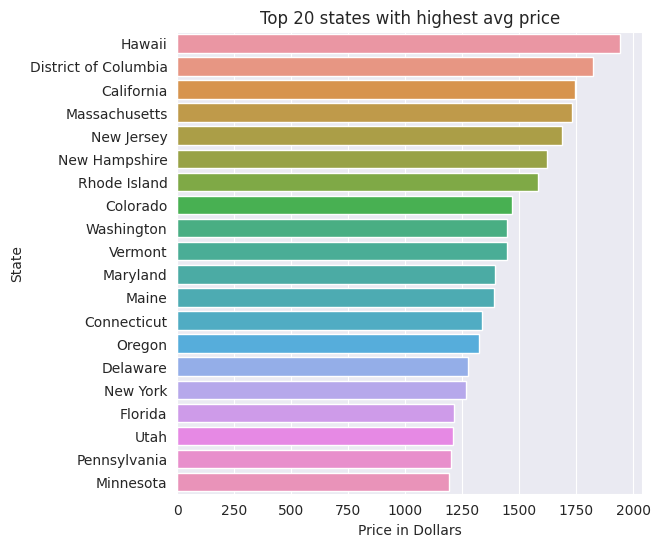

In [59]:
states = state_price_sqft.sort_values('price', ascending = False).head(20)
plt.figure(figsize=(6,6))
sns.barplot(state_price_sqft, x='price',y=states.state)
plt.title('Top 20 states with highest avg price')
plt.xlabel('Price in Dollars')
plt.ylabel('State')

Text(0, 0.5, 'State')

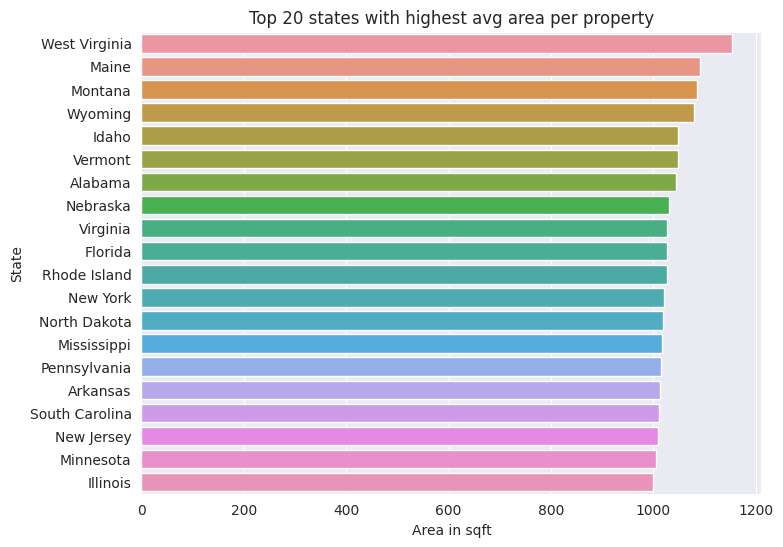

In [60]:
state_avg_area=state_price_sqft.sort_values('sqfeet', ascending = False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(state_avg_area, y=state_avg_area['state'], x=state_avg_area['sqfeet'])
plt.title('Top 20 states with highest avg area per property')
plt.xlabel('Area in sqft')
plt.ylabel('State')

The coastal states are on the higher average price side while the landlocked states are on the higher average area side. The coastal states are home to a larger fraction of working class population hence the prices are higher due to more demand. The landlocked states having a lower population density and difficult terrain have higher average area per property.

### 8. How does the average price per unit area for a property vary across the country. Use a choropleth map to highlight this variation. 

In [61]:
download_file='https://www.kaggle.com/datasets/pompelmo/usa-states-geojson'
od.download(download_file)

Skipping, found downloaded files in "./usa-states-geojson" (use force=True to force download)


In [62]:
!pip install geopandas --upgrade --quiet
import geopandas as gpd
from folium.features import GeoJsonTooltip

In [63]:
geojson = gpd.read_file('/content/usa-states-geojson/us-states.json')

In [64]:
df=state_price_sqft.copy()

dict={"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT",
      "Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS",
      "Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN",
      "Mississippi": "MS","Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM",
      "New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI",
      "South Carolina": "SC", "South Dakota": "SD","Tennessee": "TN", "Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA",
    "West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC"}

df['state']=df['state'].replace(dict)


In [65]:
df.head()

,state,price,sqfeet,price per sqft
0,AL,880.146138,1044.482255,0.889740
1,AK,1162.438805,915.370019,1.376868
2,AZ,1043.317322,862.215462,1.267979
3,AR,857.761889,1012.446337,0.889635
4,CA,1744.697406,933.208093,2.014283


In [66]:
map = folium.Map(location=[48, -102], zoom_start=3,tiles = "cartodbpositron")

In [67]:
folium.Choropleth(
    geo_data = geojson,
    data = df,
    columns = ['state','price per sqft'],
    key_on = 'feature.properties.id',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Price per Sqft",highlight = True
).add_to(map)

folium.LayerControl().add_to(map)
map

Coastal states have a relatively higher average price per unit area than the central states due to the rapid migration of working class to these states which has probably resulted in the higher demand for accomadation. The central and the northern states due to various geographical and economical factors have lower average prices per unit area.

In [68]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
